# Assignment #1 

#### Machine Learning in Korea University
#### COSE362, Fall 2018 (Prof. Jaewoo Kang)
#### Due : 11/6 (TUE) 11:59 PM









#### In this assignment, you will learn model selection process among various hyperparameters.
* Implementation detail: Anaconda 5.3 with python 3.7
* Use given dataset. Please do not change training / validation / test split.
* Use numpy, scikit-learn, and matplotlib library

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 1. Linear Regression with Feature Selection
In this example we will conduct featrue selection process in linear regression model. <br>
You will use data in 'LinReg' directory for this example. <br>
Please perform the following steps. 
> 0. Preprocess: Change given dataset into input array for scikit-learn model.
> 1. Feture selection : perform greedy feature selection.
> 2. Plot: plot validation and train error against number of feature.
> 3. Model selection and evaluation: Select best model and perform evaluation on test dataset



### 1-0. Preprocess
Load dataset and process it into appropriate array form.
* Example <br>
> For linear regression problem, the datasets are described onto 'dev_sample.npy', 'dev_label.npy', 'test_sample.npy', 'test_label.npy' in 'LinReg' folder. <br>
> Load these datasets onto <b>X_dev, y_dev, X_test, y_test</b>. <br>
> You may need to use numpy.load function

In [2]:
# Load linear regression datasets
# Your code here
X_dev = np.load('./LinReg/dev_sample.npy')
y_dev = np.load('./LinReg/dev_label.npy')
X_test = np.load('./LinReg/test_sample.npy')
y_test = np.load('./LinReg/test_label.npy')
# End your code

print(X_dev.size)
print(y_dev.size)
print(X_test.size)
print(y_test.size)

113400
900
12600
100


### 1-1. Feature selection
Build linear regression models with different number of features. (1 ~ 100)<br>
Please use <b>cross validation</b>, <b>greedy approach</b> for feature selection until choose optimal number of features. <br> 

* For cross validaton, you need to split your development set into 5-fold. This is implemented into class <b>cv</b>.
* Feature selection example : Input with 10 features
> Call 10 features as #1, #2, #3, ..., #10 <br>
> First build 10 models with only one feature. 
> Compare model with #1, model with #2, ... , model with #10 <br>
> Choose feature of the best model. (for example, #1 is the best) <br>
> Build model with 2 features. (#1, #2), (#1, #3), ..., (#1, #10). <br>
> Then, add feature with the best performance. <br>
> And so on...

<b>For the next step, please save validation and train error of the best model for each number of selected features.



In [211]:
# Define linear regression function
# You may use sklearn.linear_model.LinearRegression
# Your code here
model = LinearRegression()
# End your code

# Basic settings. DO NOT MODIFY
selected_feature = []
sel_num = 100
valid_split = 1/5
cv = ShuffleSplit(n_splits=5, test_size=valid_split, random_state=0)

selected_train_error = []
selected_valid_error = []

# for train_index, test_index in cv.split(X_dev) :
#     print('test X:\n', train_index, test_index)

# For greedy selection
for sel in range(sel_num) :
    min_train_error = +1000
    min_valid_error = +1000
    min_feature = 0
    
    # For each feature
    for i in range(X_dev.shape[1]) : # zz :126
        train_error_ith = []
        valid_error_ith = []
        
        # Select feature greedy
        # Hint : There should be no duplicated feature in selected_feature
        # Your code here
        if i in selected_feature:
            continue
        else:
            X_dev_fs = X_dev[:, [*selected_feature, i]]
        # End your code
        
        # For cross validation
        for train_index, test_index in cv.split(X_dev) :
            X_train, X_valid = X_dev_fs[train_index], X_dev_fs[test_index]
            y_train, y_valid = y_dev[train_index], y_dev[test_index]
        
            # Derive training error, validation error
            # You may use sklearn.metrics.mean_squared_error, model.fit(), model.predict()
            # Your code here
            fitted_model = model.fit(X_train, y_train)

            prediction_train = fitted_model.predict(X_train)
            prediction_valid = fitted_model.predict(X_valid)

            train_error_ith.append(mean_squared_error(y_train, prediction_train))
            valid_error_ith.append(mean_squared_error(y_valid, prediction_valid))
            # End your code
            
        # Select best performance feature set on each features
        # You should choose the feature which has minimum mean cross validation error
        # Your code here
        train_error_average = np.mean(train_error_ith)
        valid_error_average = np.mean(valid_error_ith)
        
        if train_error_average <= min_train_error :
            min_train_error = train_error_average 
        if valid_error_average <= min_valid_error :
            min_valid_error = valid_error_average 
        if valid_error_average <= min_valid_error :
            min_feature = i
        # End your code
    print('='*50)
    print("# of selected feature(s) : {}".format(sel+1))
    print("Selected feature of this iteration : {}".format(min_feature))
    selected_feature.append(min_feature)
    selected_train_error.append(min_train_error)
    selected_valid_error.append(min_valid_error)

# of selected feature(s) : 1
Selected feature of this iteration : 1
# of selected feature(s) : 2
Selected feature of this iteration : 3
# of selected feature(s) : 3
Selected feature of this iteration : 45
# of selected feature(s) : 4
Selected feature of this iteration : 109
# of selected feature(s) : 5
Selected feature of this iteration : 53
# of selected feature(s) : 6
Selected feature of this iteration : 44
# of selected feature(s) : 7
Selected feature of this iteration : 43
# of selected feature(s) : 8
Selected feature of this iteration : 116
# of selected feature(s) : 9
Selected feature of this iteration : 95
# of selected feature(s) : 10
Selected feature of this iteration : 21
# of selected feature(s) : 11
Selected feature of this iteration : 77
# of selected feature(s) : 12
Selected feature of this iteration : 80
# of selected feature(s) : 13
Selected feature of this iteration : 97
# of selected feature(s) : 14
Selected feature of this iteration : 26
# of selected feature(s) : 15

# of selected feature(s) : 69
Selected feature of this iteration : 124
# of selected feature(s) : 70
Selected feature of this iteration : 5
# of selected feature(s) : 71
Selected feature of this iteration : 86
# of selected feature(s) : 72
Selected feature of this iteration : 55
# of selected feature(s) : 73
Selected feature of this iteration : 16
# of selected feature(s) : 74
Selected feature of this iteration : 27
# of selected feature(s) : 75
Selected feature of this iteration : 61
# of selected feature(s) : 76
Selected feature of this iteration : 32
# of selected feature(s) : 77
Selected feature of this iteration : 23
# of selected feature(s) : 78
Selected feature of this iteration : 41
# of selected feature(s) : 79
Selected feature of this iteration : 87
# of selected feature(s) : 80
Selected feature of this iteration : 9
# of selected feature(s) : 81
Selected feature of this iteration : 59
# of selected feature(s) : 82
Selected feature of this iteration : 60
# of selected feature

### 1-2. Plot error
Plot train and validation error against number of features.<br>
After plotting, <b>analyze the result graph.

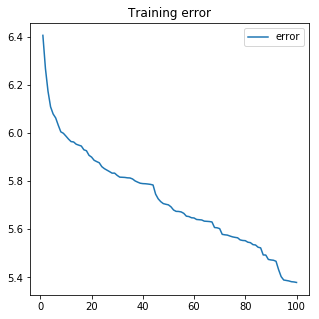

In [213]:
# Train error plot
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,sel_num+1), selected_train_error)
plt.title('Training error')
plt.legend(['error'])
plt.show()

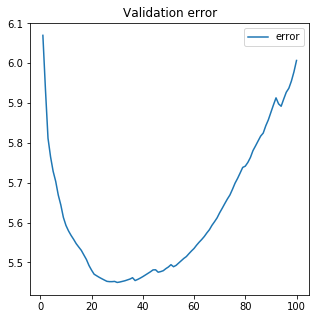

In [214]:
# Validation error plot
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,sel_num+1), selected_valid_error)
plt.title('Validation error')
plt.legend(['error'])
plt.show()

### Analyze
Write explanation of graph below. <br>
Analyze the folloing points.
* Trend of each error against number of features
* Meaning of gap between vlidation error and train error
* Meaning of each region in graph
* Others...

feature 수를 약 30개까지 늘릴 경우에는 training error와 validation error가 동시에 감소하지만, 이후부터는 training error는 계속 감소하는반면 validation error는 다시 증가하는 형태를 보인다. feature의 수가 약 20개 a미만의 경우 training error와 validation error가 모두 높은 high bias상태를 의미하고(underfit 되어있음), 60개 이상의 경우에는 high varaince를 의미한다(overfitting 발생). high bias의 경우 feature의 개수를 늘려 해결할 수 있고, high variance의 경우 feature의 개수를 다시 줄이거나 @@@하여 해결할 수 있다.

### 1-3. Model selection and evaluation
Select the best model and perform a test on test dataset.<br>
Print the <b>performance on test set</b> with <b>features of the best model.

In [ ]:
# Select optimal feature set corresponding the minimum cross validation error
# Your code here
min_valid_error = +1000
for i, j in enumerate(selected_valid_error) :
    if j < min_valid_error :
        min_valid_error = j
        best_feature_num = i
print('best number of features is : ',best_feature_num)

X_dev_fs = X_dev[:, selected_feature[:best_feature_num]]
# End your code

# Basic settings. DO NOT MODIFY
min_train_error = 1000
min_valid_error = 1000
optimal_param = np.array([])

for train_index, test_index in cv.split(X_dev) :
    X_train, X_valid = X_dev_fs[train_index], X_dev_fs[test_index]
    y_train, y_valid = y_dev[train_index], y_dev[test_index]
    print('X_train is ', len(X_train),  X_train)
    
    
    # Derive training error, validation error for each fold
    # For each fold, you need to compare error with previous minimum error.
    # Your code here
    fitted_model = model.fit(X_train, y_train)
    prediction_train = fitted_model.predict(X_train)
    prediction_valid = fitted_model.predict(X_valid)
    
    mse_train = mean_squared_error(y_train, prediction_train)
    mse_valid = mean_squared_error(y_valid, prediction_valid)
    
    if mse_train < min_train_error :
        min_train_error = mse_train
    if mse_valid < min_valid_error :
        min_valid_error = mse_valid
    # End your code

# Find the best model on each fold
# Derive test error with best performance model
# Your code here
for test_index in selected_feature[:best_feature_num] :
    x_test = X_test[test_index]
    y_test_ = y_test[test_index]
    
    fitted_model = model.fit(x_test, y_test_)
    prediction_test = fitted_model.predict(x_test)
    test_error = mean_squared_error(y_test_, prediction_test)
    
# End your code

# Drop features of final model
print("Results")
print("# of selected features : {}".format(len(selected_feature)))
print("Selected features : ")
print(selected_feature)

# Drop test error and accuracy
print("Training error : {}".format(min_train_error))
print("Validation error : {}".format(min_valid_error))
print("Test error : {}".format(test_error))

## 2. Logistic Regression with Regularizer

In this example you will explore the effect of regularization parameter.<br>
You will use <b>'Heart Disease Dataset'</b> in <b>'LogReg'</b> for this example. <br>

The goal is to predict the presence of heart disease given attributes of a patient.<br>
The presence is integer valued from 0 (no presence) to 4, but you have to only distingush presensence (values 1,2,3,4) from absence (value 0). <br>
Each attribute is described below. <br>

> 1. age : age in years <br>
> 2. sex : sex (1 = male; 0 = female) <br>
> 3. cp : chest pain type <br>
-- Value 1: typical angina <br>
-- Value 2: atypical angina <br>
-- Value 3: non-anginal pain <br>
-- Value 4: asymptomatic  <br>
> 4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)  <br>
> 5. chol : serum cholestoral in mg/dl  <br>
> 6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
> 7. restecg  : resting electrocardiographic results <br>
-- Value 0: normal <br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
> 8. thalach : maximum heart rate achieved <br>
> 9. exang : exercise induced angina (1 = yes; 0 = no) <br>
> 10. oldpeak : ST depression induced by exercise relative to rest <br>
> 11. slope : the slope of the peak exercise ST segment <br>
-- Value 1: upsloping <br>
-- Value 2: flat <br>
-- Value 3: downsloping  <br>
> 12. ca : number of major vessels (0-3) colored by flourosopy  <br>
> 13. thal : 3 = normal; 6 = fixed defect; 7 = reversable defect  <br>


### 2-0. Preprocess

Firstly, read training, validation and test datasets respectively. <br>


In [215]:
def read_data(data_type):
    f = open('./LogReg/' + data_type + '.data', 'r')

    X, Y = [],[]
    while True:
        line = f.readline()
        if not line: break
        spl = line.split(',')
        x = spl[:-1]
        y = int(spl[-1])
        
        X.append(list(map(float, x)))
        
        # Define the variable 'binary_label'.
        # Note that labels must be 1 or 0.
        # Your code here
        binary_label = 1 if (y!=0) else 0
        
        Y.append(binary_label)  # blank
    
    return X, Y

X_tr, Y_tr = read_data('train')
X_va, Y_va = read_data('valid')
X_te, Y_te = read_data('test')

### Normalization and Converting to one-hot vector

Data preprocessing takes several steps after loading data. <br>
1. <b>Normailze</b> numerical values. Normalization is defined as <b><i>normalized_value</i> = (value - mean) / std</b>. <br>
   You should calculate mean and standard deviation (std) on <b> train data </b> and normalize train, valid and test data.
2. For categorical attributes, <b>build dictionaries</b> of each attribute and convert the categorical values to <b>one-hot vectors</b>. <br>
3. Concatenate all the obtained values. <br>

If you have done correctly, you will get results that are same format as below: 
* <b>before</b> : [63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0]
* <b>after</b> : [0.11099784710934087, 0, 1, 1, 0, 0, 0, 0.035386000081823056, -0.005256085700922788, 0, 1, 0, 0, 1, 0.0026598418293161848, 1, 0, 0.6659671864819814, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0] <br>
(The values in the above example can be different from actual values.)<br>

<b>Do not use any library such as sklearn.preprocessing. You can use only Numpy. </b><br>


In [216]:
# Your code here
from collections import Iterable

def flatten(items):
    """Yield items from any nested iterable; see Reference."""
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            for sub_x in flatten(x):
                yield sub_x
        else:
            yield x

            
def one_hot(training_list) :
    return_list = []
    category_dict = {i : c for c, i in enumerate(set(training_list))}
    
    for x in training_list:
        arr = np.zeros(len(category_dict), dtype=int)
        np.put(arr, category_dict[x], 1)
        return_list.append(arr.tolist())

    return return_list


'''
pre-processing
'''
def preprocessing(X_tr) :
    numerical = [0, 3, 4, 7, 9]
    categorical = list(set([i for i in range(13)]) - set(numerical))

    # numerical
    for i in numerical:
        X_tr_list_ith = [row[i] for row in X_tr]

        mean = sum(X_tr_list_ith)/len(X_tr_list_ith)
        std = np.std(X_tr_list_ith)

        #normalization
        for row in X_tr :
            row[i] = (row[i] - mean)/std

    # categorical
    for i in categorical:
        new_list = []
        X_tr_list_ith = [int(row[i]) for row in X_tr]
        new_list = one_hot(X_tr_list_ith)
        for index, row in enumerate(X_tr):
            row[i] = new_list[index]


    # get pre-processed train data
    tmp = []
    for row in X_tr:
        tmp.append(list(flatten(row)))
    
    return np.array(tmp)
    
X_tr = preprocessing(X_tr)
X_va = preprocessing(X_va)
X_te = preprocessing(X_te)
Y_tr = np.array(Y_tr)
Y_va = np.array(Y_va)
Y_te = np.array(Y_te)
# End your code

### 2-1. Logistic regression model and regularizer
Build logistic regression model with l2 regularization utilizing sklearn. <br>
Find the optimal coefficient based on <b>cross entropy loss</b> on thet validation set. <br>
Try following regularization parameter settings.
* Regularization parameters = 0.01, 0.05, 0.1, 0.5, 1, 10, 100 <br>
* Note that regluarization parameter for LogisticRegression in sklearn is inverse of true parameter. <br>
  (coef = 0.001 for LogisticRegression   =>  $\lambda$ = 1000 in our course note)
* Your model should be <b>LogisticRegression(C=coef, solver='lbfgs', max_iter=500). </b>
  <br>  <b>Do not change the model setting except C. </b> 
  <br> (coef = each regularization parameter)

In [217]:
# Please use below function
# logreg = LogisticRegression(C=coef, solver='lbfgs', max_iter=500)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

coefs = [0.01, 0.05, 0.1, 0.5, 1, 10, 100]

opt_coef = 1


# To plot losses on training and validation sets with varied parameter settings, 
# save them on lists.
loss_tr, loss_va = [],[]

# Your code here
optimal_loss = +1000


for itr_, coef in enumerate(coefs):
    logreg = LogisticRegression(C=coef, solver='lbfgs', max_iter=500)
    logreg.fit(X_tr, Y_tr)
    predict_train = logreg.predict(X_tr)
    predict_validation = logreg.predict(X_va)
    
    loss_tr.append(log_loss(Y_tr, predict_train))
    loss_va.append(log_loss(Y_va, predict_validation))
    
    if loss_va[itr_] < optimal_loss:
        optimal_loss = loss_va[itr_]
        opt_coef = coef

# End your code

### 2-2. Plot error
Plot the train and validation loss against given regularization parameter <b>(not inverse)</b>.<br>
<b> Analyze the result.

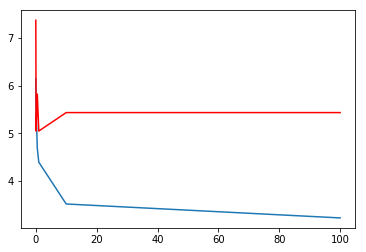

In [218]:
# Do not fix the code!!

plt.plot(coefs, loss_tr, coefs, loss_va, 'r-')
plt.show()

### Analyze 
Write explanation of graph below.

### 2-3. Model selection and evaluation

Drop the performance on test set with the regularization coefficient of the best model.

In [ ]:

# Your code here

# End your code


#print regularization paramter of final model and drop test loss and accuracy
print ("Optimal : {}, Loss : {:2.3f}, Accuracy : {:3.2f}".format(coef, test_loss, test_acc*100))